

```
4. Use Autoencoder to implement anomaly detection. Build the model by using the following:
a. Import required libraries
b. Upload/access the dataset
c. The encoder converts it into a latent representation
d. Decoder networks convert it back to the original input
e. Compile the models with Optimizer, Loss, and Evaluation Metrics
```



A. Import required libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt


B. Upload/access the dataset

In [2]:
# Load your dataset or generate an example dataset
# For demonstration, let's create an example dataset
normal_data = np.random.normal(0, 1, (1000, 64))  # Normal data
anomaly_data = np.random.normal(3, 1, (50, 64))    # Anomaly data
data = np.vstack([normal_data, anomaly_data])


C. The encoder converts it into a latent representation

In [3]:
input_layer = keras.Input(shape=(64,))
encoded = layers.Dense(32, activation='relu')(input_layer)  # Encoding layer
encoder = keras.Model(input_layer, encoded)


D. Decoder networks convert it back to the original input

In [4]:
decoded = layers.Dense(64, activation='sigmoid')(encoded)  # Decoding layer
autoencoder = keras.Model(input_layer, decoded)


E. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [5]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


F. Train the autoencoder

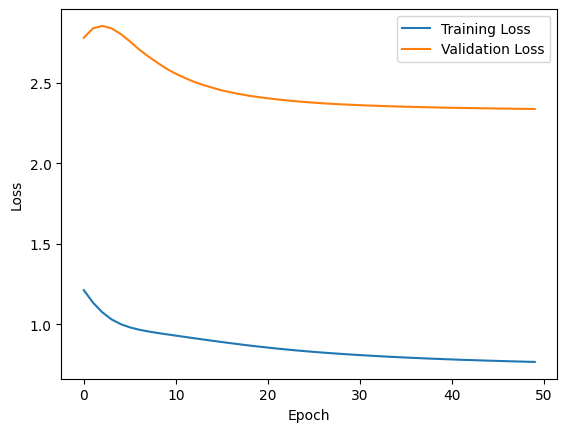

In [6]:
history = autoencoder.fit(data, data, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


G. Anomaly Detection

In [7]:
reconstructed_data = autoencoder.predict(data)
reconstruction_errors = np.mean(np.square(data - reconstructed_data), axis=1)

threshold = np.percentile(reconstruction_errors, 95)  # You can adjust the threshold

# Identify anomalies based on the threshold
anomalies = data[reconstruction_errors > threshold]

print(f"Number of anomalies: {len(anomalies)}")


33/33 [==============================] - 0s 1ms/step
Number of anomalies: 53
